> Бакин Владислав Артемович, ИВТ-23-1б

# Practice 10-22-2024

## Упражнение: Вычисление числа pi с помощью метода Монте-Карло

1. ### Формулы

Площадь квадрата: $s = (2 r)^2$

Площадь круга: $c = \pi r^2$

$c/s = (\pi r^2)/(4r^2) = \pi /4$

$pi = 4 * c/s$

![](https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.svg)

2. ### Импорт требуемых библиотек

In [1]:
import random
import matplotlib.pyplot as plt

3. ### Инициализация количества точек

In [2]:
num_points = 1000

4. ### Броски дротиков

In [3]:
points = []
hits = 0
for _ in range(num_points):
    x, y = random.random(), random.random()
    if x*x + y*y < 1.0:
        hits += 1
        points.append((x, y, "blue"))
    else:
        points.append((x, y, "red"))

5. ### Построение графика результатов

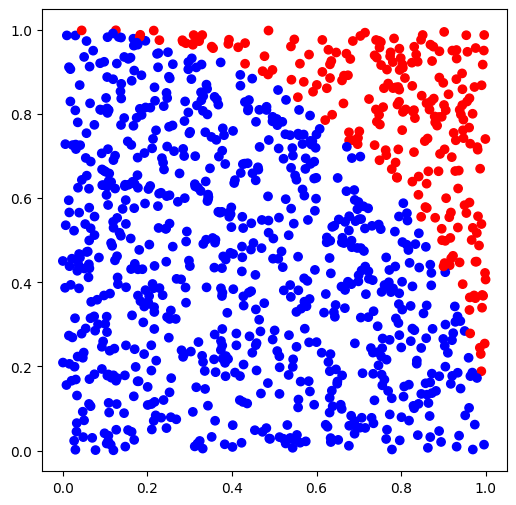

In [4]:
x, y, colors = zip(*points)

fig, ax = plt.subplots() 
fig.set_size_inches(6.0, 6.0)

ax.scatter(x, y, c=colors)

6. ### Вычисление оценки для pi

In [5]:
fraction = hits / num_points
4 * fraction

3.096

## Блокноты и контроль версий

### Работаем с обычным git diff

1. Для понимания проблемы можно посмотреть пример блокнота (https://github.com/coderefinery/jupyter/blob/main/example/darts.ipynb), а затем исходный код (https://raw.githubusercontent.com/coderefinery/jupyter/main/example/darts.ipynb) в формате `JSON`.
2. Затем мы вносим в пример блокнота простые изменения, например, меняем цвета (заменяем "красный" и "синий" на что-то другое), а также меняем размеры в `fig.set_size_inches(6.0, 6.0)`
3. Запускаем все ячейки.
4. Сохраняем изменение (значок сохранения) и в терминале JupyterLab пробуем "нормальный" `gitdiff` и видим, что это не очень хорошо сработало. Напишите почему в ячейке с комментарием ниже.

### Пояснение

Вывод `git diff` можно посмотреть в APE/prac1/diff_output.txt

1. Изменение формата: Блокноты Jupyter хранятся в формате JSON, который содержит не только код, но и метаданные, результаты выполнения и т. д.
2. Сложные различия: При внесении небольших изменений в код (например, изменения цветов и размеров) Git может отобразить много изменений в структуре JSON, что затрудняет восприятие значимых изменений.
3. Невозможность понятного сравнения: Из-за этого `git diff` показывает множество несущественных изменений, и трудно понять, что конкретно было изменено в коде.

### Упражнение: создание `requirements.txt`?

In [6]:
pip freeze # Просмотр версий

aiohappyeyeballs==2.4.3
aiohttp==3.10.10
aiosignal==1.3.1
anyio==4.6.2.post1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-exit-stack==1.0.1
async-lru==2.0.4
attrs==24.2.0
babel==2.16.0
beautifulsoup4==4.12.3
bleach==6.1.0
certifi==2020.12.5
cffi==1.17.1
charset-normalizer==3.4.0
click==8.1.7
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.7
decorator==5.1.1
defusedxml==0.7.1
dnspython==2.7.0
executing==2.1.0
fastjsonschema==2.20.0
fonttools==4.54.1
fqdn==1.5.1
frozenlist==1.5.0
golem-api-python==0.1.1
h11==0.14.0
httpcore==1.0.6
httpx==0.27.2
humanize==4.11.0
idna==3.10
ipykernel==6.29.5
ipython==8.29.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.4
json5==0.9.25
jsonpointer==3.0.0
jsonrpc-base==1.1.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.10.0
jupyter-lsp==2.2.5
jupyter-on-golem==0.1.3
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server==2.1

In [7]:
!python3 -m pip install -r requirements.txt

### exc 1 - add widget

In [8]:
from matplotlib import pyplot
import random
from ipywidgets import interact, widgets

%matplotlib inline


def throw_darts(num_points):
    points = []
    hits = 0
    for _ in range(num_points):
        x, y = random.random(), random.random()
        if x*x + y*y < 1.0:
            hits += 1
            points.append((x, y, True))
        else:
            points.append((x, y, False))
    fraction = hits / num_points
    pi = 4 * fraction
    return pi, points


def create_plot(points):
    x, y, colors = zip(*points)
    pyplot.scatter(x, y, c=colors)


def experiment(num_points):
    pi, points = throw_darts(num_points)
    create_plot(points)
    print("approximation:", pi)

interactive(children=(IntSlider(value=1000, description='num_points', max=10000, min=100, step=100), Output())…

<function __main__.experiment(num_points)>

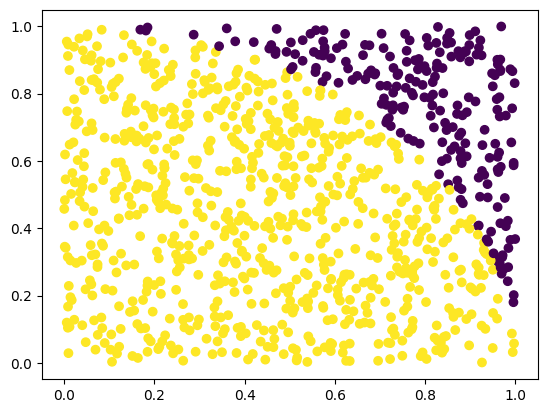

In [9]:
interact(experiment, num_points=widgets.IntSlider(min=100, max=10000, step=100, value=1000))